In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('spam.csv', encoding='windows-1250')

In [15]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5384,ham,How are you babes. Hope your doing ok. I had a...,NaN,NaN,NaN
706,ham,So when do you wanna gym harri,NaN,NaN,NaN
4844,ham,Missing you too.pray inshah allah,NaN,NaN,NaN
2983,ham,He said that he had a right giggle when he saw...,NaN,NaN,NaN
5399,ham,And he's apparently bffs with carly quick now,NaN,NaN,NaN


In [16]:
# # To deal with error where data cannot be decoded using utf8
# import charset_normalizer
# # look at the first ten thousand bytes to guess the character encoding
# with open("spam.csv", 'rb') as rawdata:
#     result = charset_normalizer.detect(rawdata.read(10000))

# # check what the character encoding might be
# print(result)

In [17]:
df.shape

(5572, 5)

In [18]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvements
# 7. Streamlit App
# 8. deploy on streamlit community cloud

# 1.Data Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
# drop last 3 col
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [21]:
df.sample(5)

,v1,v2
4356,ham,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L..."
2321,ham,Ok...
2506,ham,Who u talking about?
2076,ham,"Trust me. Even if isn't there, its there."
2150,ham,"The table's occupied, I'm waiting by the tree"


In [22]:
# Renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [23]:
df.sample(5)

,target,text
2417,ham,Oh... Lk tt den we take e one tt ends at cine ...
1404,ham,Actually getting ready to leave the house.
4069,ham,Ok i wont call or disturb any one. I know all ...
10,ham,I'm gonna be home soon and i don't want to tal...
205,ham,ĚĎ say until like dat i dun buy ericsson oso c...


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
df.target = encoder.fit_transform(df.target)

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
# Duplicate values
df.duplicated().sum()

403

In [29]:
# Remove duplicates
df = df.drop_duplicates(keep='first')

In [30]:
df.duplicated().sum()

0

In [31]:
df.shape

(5169, 2)

# 2.EDA

In [32]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

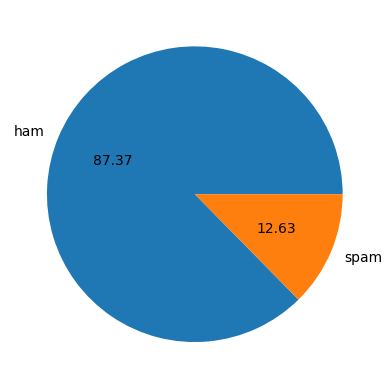

In [34]:
plt.pie(df.target.value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

#### Data is imbalanced 🔼

In [35]:
import nltk

In [36]:
nltk.download('punkt', 'stopwords')

[nltk_data] Downloading package punkt to stopwords...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
df['num_characters'] = df.text.apply(len)

In [38]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
# num of words
df['num_words'] = df.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [41]:
df['num_sentences'] = df.text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [42]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [43]:
# ham
df[df.target == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
# spam
df[df.target == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

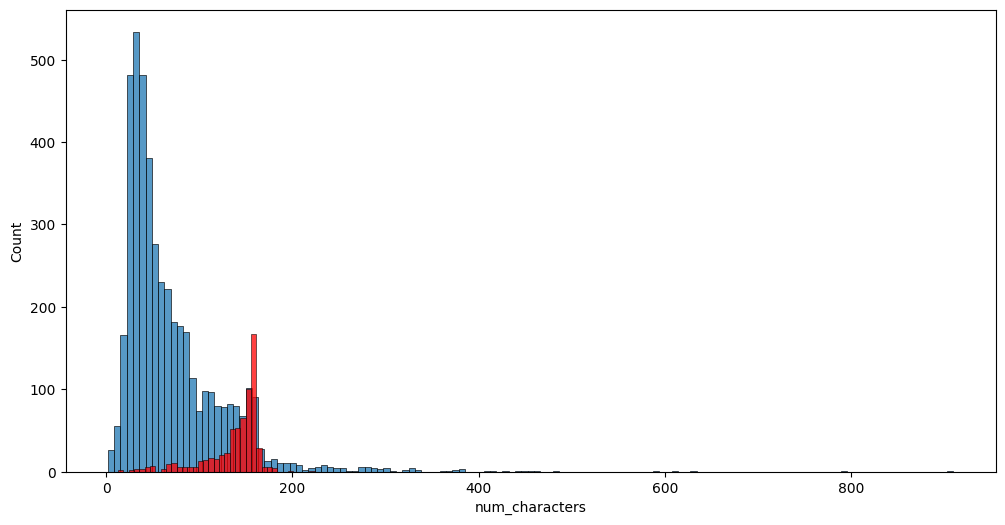

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target == 0]['num_characters'])
sns.histplot(df[df.target == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

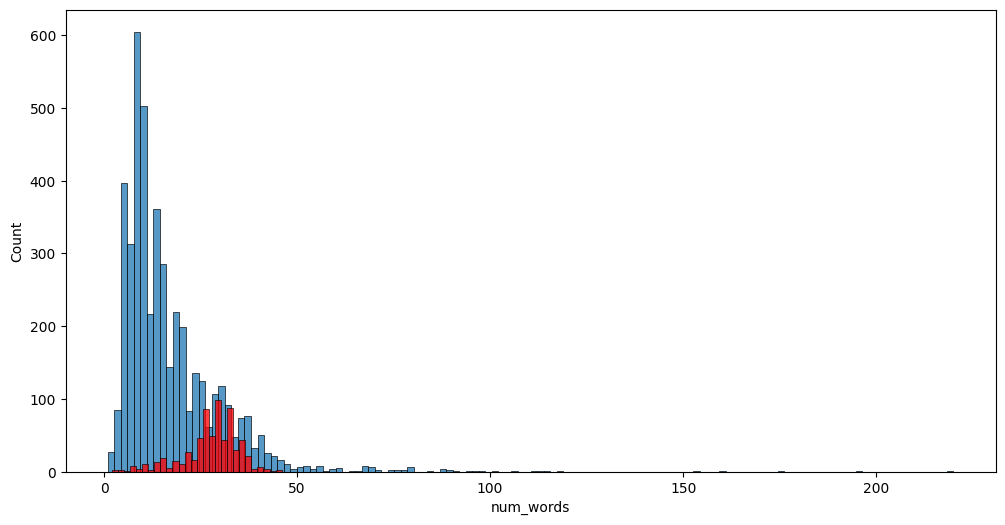

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df.target == 0]['num_words'])
sns.histplot(df[df.target == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

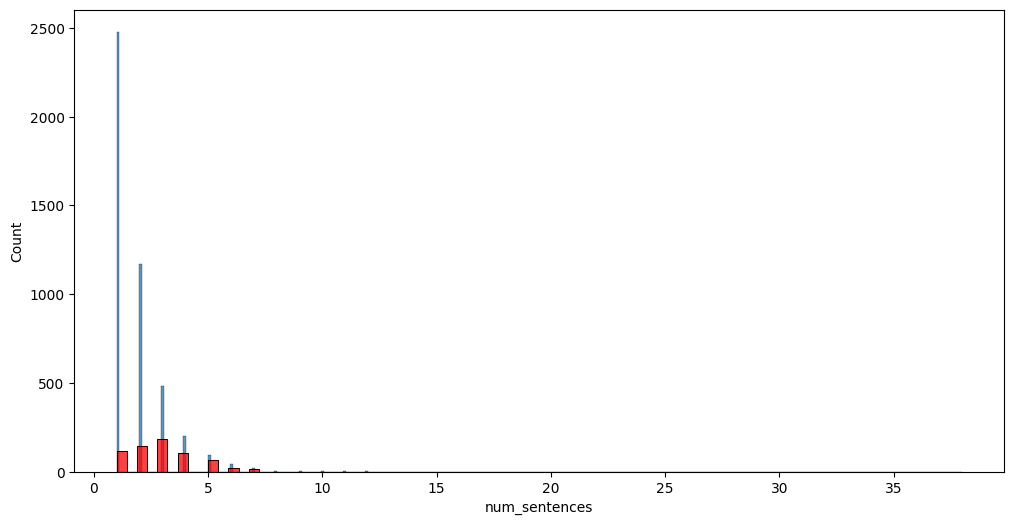

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df.target == 0]['num_sentences'])
sns.histplot(df[df.target == 1]['num_sentences'], color='red')

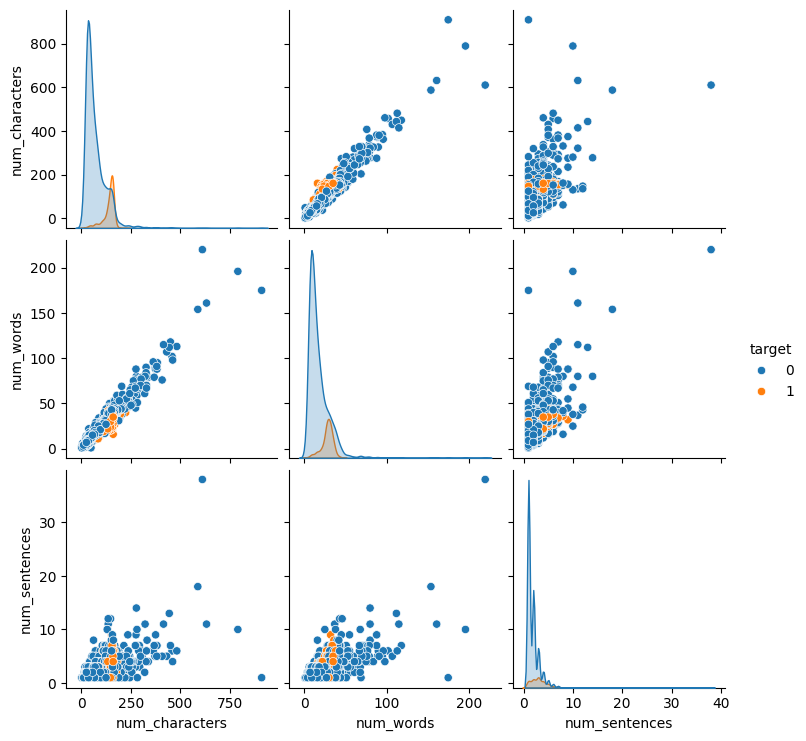

In [48]:
sns.pairplot(df, hue='target')

In [49]:
df[['target', 'num_characters', 'num_words', 'num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

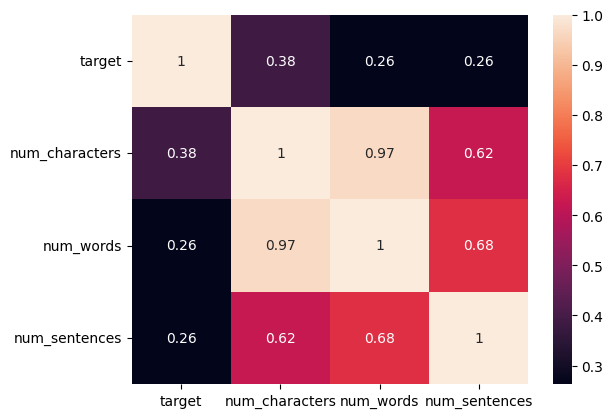

In [50]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

# 3.Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- stemming

In [51]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

In [52]:
def transform_text(text):
    # lower case
    text = text.lower()

    # tokenization
    text = nltk.word_tokenize(text)

    # removing punctuation
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    # removing stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    # stemming
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [53]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [54]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [55]:
df['transformed_text'] = df.text.apply(transform_text)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [58]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

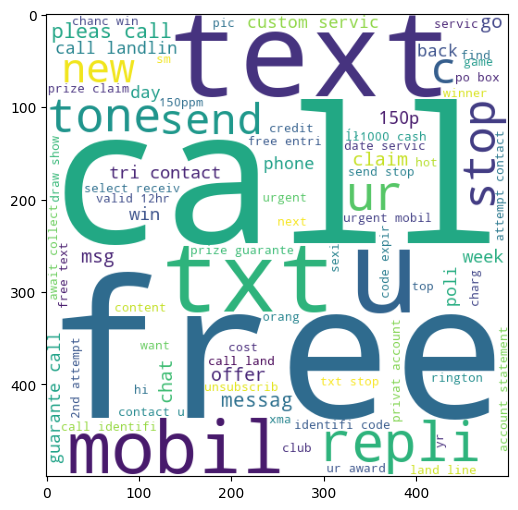

In [59]:
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc)

In [60]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

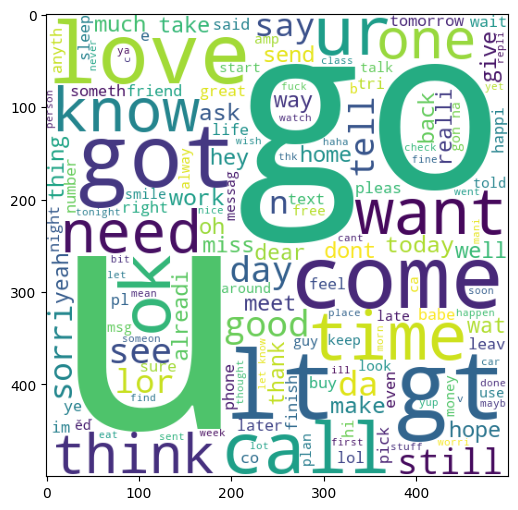

In [61]:
plt.figure(figsize=(12, 6))
plt.imshow(ham_wc)

In [62]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
spam_corpus= []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [64]:
len(spam_corpus)

10125

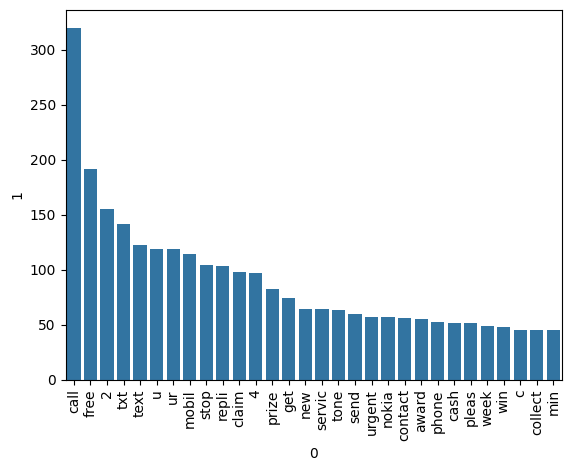

In [65]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
ham_corpus= []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [67]:
len(ham_corpus)

35407

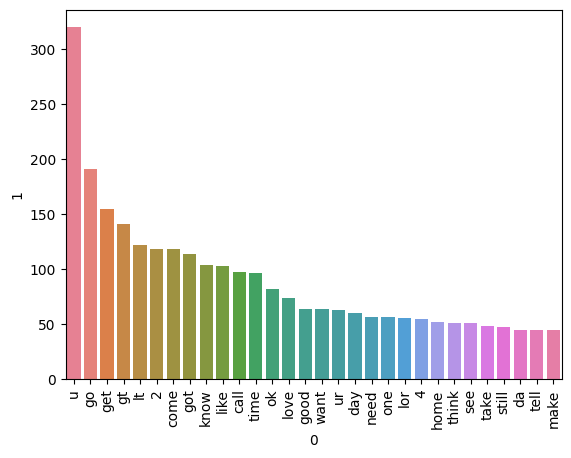

In [107]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], hue=pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [70]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [71]:
X.shape

(5169, 3000)

In [72]:
y = df['target'].values

In [73]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [76]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [78]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [79]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


##### TFIDF --> mnb

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [82]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [83]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [84]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8585858585858586
For  LR
Accuracy -  0.9574468085106383
Precision -  0.97
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9911504424778761


c:\Users\dell\anaconda3\envs\ML_DEV\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.956140350877193
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8582677165354331
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9834710743801653
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9652173913043478


In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [87]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.972921,1.000000
5,RF,0.973888,0.991150
8,ETC,0.979691,0.983471
0,SVC,0.975822,0.974790
4,LR,0.957447,0.970000
10,xgb,0.970019,0.965217
6,AdaBoost,0.967118,0.956140
9,GBDT,0.949710,0.930000
3,DT,0.935203,0.858586


In [88]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [89]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.972921
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.975822
5,LR,Accuracy,0.957447
6,xgb,Accuracy,0.970019
7,AdaBoost,Accuracy,0.967118
8,GBDT,Accuracy,0.949710
9,DT,Accuracy,0.935203


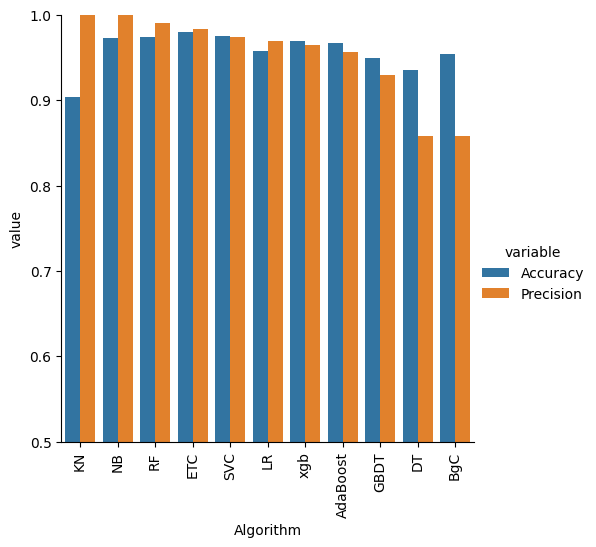

In [90]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [91]:
# Model Improve
# 1. Change the max_features parameter ofTfIdf

In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [94]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [95]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [97]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
1,NB,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
2,RF,0.973888,0.991150,0.973888,0.991150,0.973888,0.991150,0.973888,0.991150
3,ETC,0.979691,0.983471,0.979691,0.983471,0.979691,0.983471,0.979691,0.983471
4,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,LR,0.957447,0.970000,0.957447,0.970000,0.957447,0.970000,0.957447,0.970000
6,xgb,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217
7,AdaBoost,0.967118,0.956140,0.967118,0.956140,0.967118,0.956140,0.967118,0.956140
8,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
9,DT,0.935203,0.858586,0.935203,0.858586,0.935203,0.858586,0.935203,0.858586


In [98]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [99]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [100]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [101]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [102]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [103]:
from sklearn.ensemble import StackingClassifier

In [104]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [105]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9534883720930233


In [108]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [109]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))